In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

# State Senate Special

## Final File Load

In [4]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [5]:
final = gpd.read_file('./vest_va_2016/va_2016_statesenate_special/va_2016_statesenate_special.shp')
final.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,SOV_DIST,S16SOVDEM,S16SOVREP,S16SOVIND,S16SOVWRI,geometry
0,095,James City County,000304,Powhatan D,001,1369,1078,85,2,"POLYGON Z ((-76.76694 37.33789 0.00000, -76.76..."
1,095,James City County,000302,Powhatan B,001,561,394,34,0,"POLYGON Z ((-76.78970 37.32426 0.00000, -76.78..."
2,095,James City County,000501,Roberts A,001,927,363,41,1,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64..."
3,095,James City County,000503,Roberts C,001,312,135,25,2,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68..."
4,199,York County,000101,QUEENS LAKE,001,847,876,48,3,"POLYGON Z ((-76.68479 37.27077 0.00000, -76.68..."


# Election Results
#### Special election for state senate in VA in 2016 in districts 1 and 5

## District 1

In [6]:
df1 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_Senate_of_Virginia_General_Election_District_1_including_precincts.csv')
df1.head()

,County/City,Ward,Pct,Taylor Montgomery Mason,Thomas Richard Holston,John Bernard Bloom,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,Independent,NaN,NaN
1,Hampton City,-,204 - Forrest,209,132,11,0.0,352
2,Hampton City,-,208 - Kraft,"1,601","1,081",146,9.0,"2,837"
3,Hampton City,-,214 - Tucker Capps,"1,348",777,93,11.0,"2,229"
4,Hampton City,-,Ab - Central Absentee Precinct,362,165,20,37.0,584


In [7]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

df1 = df1.iloc[1:]
df1['SOV_DIST'] = '1'
df1['LOCALITY'] = df1['County/City']
df1['S16SOVDEM'] = df1['Taylor Montgomery Mason']
df1['S16SOVREP'] = df1['Thomas Richard Holston']
df1['S16SOVIND'] = df1['John Bernard Bloom']
df1['S16SOVWRI'] = df1['All Others']
df1 = df1.drop(['County/City', 'Taylor Montgomery Mason', 'Thomas Richard Holston', 'John Bernard Bloom', 'All Others', 'Ward'], axis = 1)

df1['S16SOVDEM'] = df1['S16SOVDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df1['S16SOVREP'] = df1['S16SOVREP'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df1['S16SOVIND'] = df1['S16SOVIND'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df1['S16SOVWRI'] = df1['S16SOVWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

print(df1.LOCALITY.nunique())
df1['COUNTYFP'] = df1['LOCALITY'].map(county_dict)
print(df1.COUNTYFP.nunique())

7
6


In [15]:
#Used to compare with VA Department of Elections
final1 = final[final['SOV_DIST'] == '001']

In [16]:
column_list = ['S16SOVDEM', 'S16SOVREP', 'S16SOVIND', 'S16SOVWRI']
for val in column_list:
    print(val, ': ', final1[val].sum())

S16SOVDEM :  49251
S16SOVREP :  31740
S16SOVIND :  3534
S16SOVWRI :  286


In [17]:
final5 = final[final['SOV_DIST'] == '005']
for val in column_list:
    print(val, ': ', final5[val].sum())

S16SOVDEM :  66989
S16SOVREP :  0
S16SOVIND :  0
S16SOVWRI :  2627


## District 5

In [12]:
df5 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_Senate_of_Virginia_General_Election_District_5_including_precincts.csv')
df5.head()

,County/City,Ward,Pct,"Lionell Spruill, Sr.",All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,NaN,NaN
1,Chesapeake City,-,3 - Camelot,"1,881",24,"1,905"
2,Chesapeake City,-,5 - Crestwood,"1,427",33,"1,460"
3,Chesapeake City,-,8 - South Norfolk Recreation,"1,422",70,"1,492"
4,Chesapeake City,-,10 - Oscar Smith,664,47,711


In [13]:
df5 = df5.iloc[1:]
df5['SOV_DIST'] = '5'
df5['LOCALITY'] = df5['County/City']
df5['S16SOVDEM'] = df5['Lionell Spruill, Sr.']
df5['S16SOVWRI'] = df5['All Others']
df5 = df5.drop(['County/City', 'Lionell Spruill, Sr.', 'All Others', 'Ward'], axis = 1)

df5['S16SOVDEM'] = df5['S16SOVDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df5['S16SOVWRI'] = df5['S16SOVWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

print(df5.LOCALITY.nunique())
df5['COUNTYFP'] = df5['LOCALITY'].map(county_dict)
print(df5.COUNTYFP.nunique())

3
2


In [8]:
df5

NameError: name 'df5' is not defined

## Districts 1 and 5 together

In [14]:
elections = []
elections.append(df1)
elections.append(df5)

df = pd.concat(elections, axis = 0)
df = df[df['LOCALITY'] != 'TOTALS']
df = df.reset_index()
df = df.fillna(0)

In [15]:
column_list = ['S16SOVDEM', 'S16SOVREP', 'S16SOVIND', 'S16SOVWRI']
for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S16SOVDEM: EQUAL
S16SOVREP: EQUAL
S16SOVIND: EQUAL
S16SOVWRI: EQUAL


In [16]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['COUNTYFP']).sum()[i]-final.groupby(['COUNTYFP']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


In [17]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [18]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTYFP']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTYFP']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTYFP']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTYFP'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['COUNTYFP']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [19]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
        
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

S16SOVDEM: EQUAL
S16SOVREP: EQUAL
S16SOVIND: EQUAL
S16SOVWRI: EQUAL
Counties with differences printed below:

All other races in all counties are equal


## Create unique id

In [20]:
print('formatting cause differences in sample ids: ', set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))

formatting cause differences in sample ids:  {'55015 ', '5505 -', '55050 ', '8301 -', '8302 -', '55056 ', '55030 ', '55053 ', '55058 ', '55048 ', '55022 ', '55025 ', '55012 ', '55011 ', '55031 ', '55013 ', '55010 ', '5503 -', '55042 ', '55032 ', '55018 ', '55040 ', '55033 ', '5508 -', '55057 ', '55029 ', '55026 ', '55055 ', '55045 ', '55024 '}


In [21]:
#Function to fix/account for above differences
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst
    
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,SOV_DIST,LOCALITY,S16SOVDEM,S16SOVREP,S16SOVIND,S16SOVWRI,COUNTYFP,...,S16SOVREP_add,S16SOVREP_rem,S16SOVREP_floor,S16SOVIND_add,S16SOVIND_rem,S16SOVIND_floor,S16SOVWRI_add,S16SOVWRI_rem,S16SOVWRI_floor,vtdst
0,1,204 - Forrest,352,1,Hampton City,233.0,143.0,12.0,0.0,650,...,11.0,0.342714,11.0,1.0,0.880000,0.0,0.0,0.000,0.0,204
1,2,208 - Kraft,"2,837",1,Hampton City,1787.0,1174.0,158.0,26.0,650,...,93.0,0.889950,92.0,12.0,0.680000,11.0,17.0,0.650,16.0,208
2,3,214 - Tucker Capps,"2,229",1,Hampton City,1504.0,844.0,100.0,31.0,650,...,67.0,0.767337,66.0,7.0,0.440000,7.0,20.0,0.350,20.0,214
5,6,201 - Jamestown A,730,1,James City County,490.0,318.0,19.0,0.0,095,...,36.0,0.365199,36.0,2.0,0.792969,1.0,0.0,0.000,0.0,201
6,7,202 - Jamestown B,"2,208",1,James City County,1424.0,995.0,79.0,4.0,095,...,114.0,0.609010,113.0,8.0,0.488281,7.0,1.0,0.375,0.0,202


In [22]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.vtdst
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)
print('unique ids in df not in vest file: ', set(df_with_absentee_reallocated.unique_id) - set(final.unique_id))
print('unique ids in vest file not in df: ', set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

unique ids in df not in vest file:  set()
unique ids in vest file not in df:  set()


# Shapefile

<AxesSubplot:>

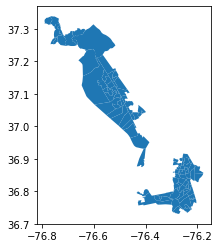

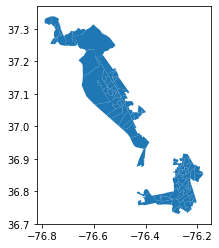

In [23]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    #print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

county_sldu = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldu_ref = ref + i + '/PVS_19_v2_sldu_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldu_shp = gpd.read_file(sldu_ref)
    #print(i, ' added to list')
    county_sldu.append(sldu_shp)

global shp_sldu
shp_sldu = gpd.GeoDataFrame(pd.concat(county_sldu, axis = 0) , crs = proj) 

overlay = gpd.overlay(shp_sldu, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)
shp = overlay[(overlay.SLDUST == '001') | (overlay.SLDUST == '005')]

shp.plot()
final.plot()

in shp not in vest file: {'710406', '710207', '710212', '550023', '550039', '710504', '710511', '199102', '550006', '710211', '800706', '095042'}
in vest file not in shp:  {'710403', '550040'}


/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,COUNTYFP,LOCALITY,VTDST,PRECINCT,SOV_DIST,S16SOVDEM,S16SOVREP,S16SOVIND,S16SOVWRI,geometry,unique_id
23,550,Chesapeake City,000040,River Birch,005,1658,0,0,113,"POLYGON Z ((-76.23347 36.78440 0.00000, -76.23...",550040
81,710,Norfolk City,000403,Brambleton,005,892,0,0,3,"POLYGON Z ((-76.28599 36.84207 0.00000, -76.28...",710403


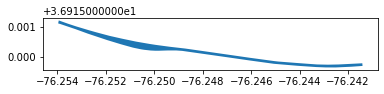

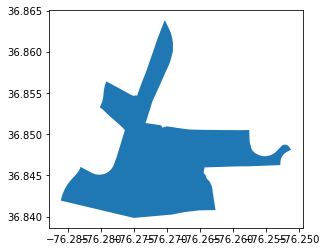

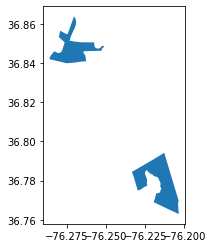

In [24]:
print('in shp not in vest file:', (set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))))
print('in vest file not in shp: ', (set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3))))

#assign shp unique id
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)
#look into discrepencies
shp[shp['unique_id'] == '710511'].plot()
final[(final['unique_id'] == '710403')].plot() #(final['unique_id'] == '710218')] |  | (final['unique_id'] == '710203')
#Within county none match up
final[final['unique_id'].isin(list(set(df_with_absentee_reallocated.unique_id) - set(shp.unique_id)))].plot()
final[final['unique_id'].isin(list(set(df_with_absentee_reallocated.unique_id) - set(shp.unique_id)))]

In [43]:
list(shp['NAME_2'][shp.unique_id.isin(list(set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))))])

['Chrysler Museum',
 'HUNTERSVILLE',
 'Barron Black',
 'Lake Drummond',
 'Deep Creek',
 'Oak Grove',
 'Lamberts Point',
 'Park Place',
 'Larrymore',
 'Crossroads',
 'Berkeley D Part 2',
 'WALLER MILL']

### Join election results and shapefile

<AxesSubplot:>

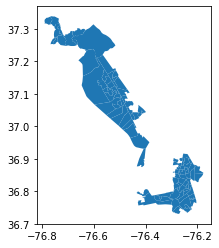

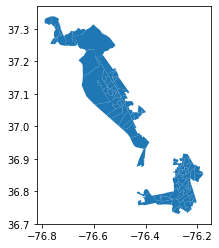

In [25]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'outer'), crs = proj)
join.plot()
final.plot()

# Validation 

## Validating Shapefile

Here, I merge the shp joined to the election results to the final file to compare

In [26]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

join['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [27]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    97
True      1
dtype: int64


1) For 15 - B M Williams difference in area is 1.1465840915872152


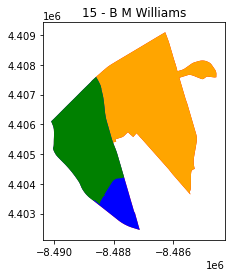

In [28]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [29]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(98, 1)
58 precincts w/ a difference of 0 km^2
29 precincts w/ a difference between 0 and .1 km^2
6 precincts w/ a difference between .1 and .5 km^2
2 precincts w/ a difference between .5 and 1 km^2
1 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


## Validating Election Results

In [31]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["unique_id"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_id"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_id"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [34]:
column_list = ['S16SOVDEM', 'S16SOVREP', 'S16SOVIND', 'S16SOVWRI']
final_join_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])
validater_row(final_join_merge, column_list)

S16SOVREP ..................................................................650204 (V) ..144  (S)..143 (D):    1
S16SOVREP ..................................................................650214 (V) ..843  (S)..844 (D):   -1
S16SOVREP ..................................................................095201 (V) ..319  (S)..318 (D):    1
S16SOVREP ..................................................................095202 (V) ..994  (S)..995 (D):   -1
S16SOVDEM ..................................................................095501 (V) ..927  (S)..926 (D):    1
S16SOVREP ..................................................................095501 (V) ..363  (S)..362 (D):    1
S16SOVDEM ..................................................................095503 (V) ..312  (S)..313 (D):   -1
S16SOVREP ..................................................................095503 (V) ..135  (S)..136 (D):   -1
S16SOVDEM ..................................................................700103 (V) .1508  (S

In [37]:
final.shape

(98, 11)

In [38]:
df_with_absentee_reallocated.shape

(98, 24)

In [39]:
join.shape

(110, 66)

In [40]:
shp.shape

(108, 43)